In [1]:
import pandas
import numpy
import xarray
import datetime
import aacgmv2
from imagers.ssusi import ssusi_utils
import os
from spacepy import pycdf
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from davitpy import utils
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
goesDir = "../data/goes/"
selDate = datetime.datetime( 2011, 7, 5, 4, 20 )
startDate = datetime.datetime( 2011, 7, 5, 3, 0 )
endDate = datetime.datetime( 2011, 7, 5, 7, 0 )
selCols = [ "time_tag_orbit", "time_tag",\
           "west_longitude", "HP_1", "HP_2",\
           "HE_1", "HE_2", "HN_1", "HN_2",\
           "HT_1", "HT_2", "sat"]

In [3]:
goesFrameList = [  ]
for subdir, dirs, files in os.walk(goesDir):
    for currFile in files:
        # check for proper date
        if selDate.strftime("%Y%m%d") in currFile:
            dsXarr = xarray.open_dataset(goesDir+currFile)
            currGoesDF = dsXarr.to_dataframe().reset_index()
            # get the sat name from the first three letters
            currGoesDF["sat"] = currFile[:3]
            goesFrameList.append( currGoesDF )
goesDF = pandas.concat( goesFrameList )
# select times and cols only
goesDF = goesDF[selCols]
goesDF = goesDF[ (goesDF["time_tag"] >= startDate) &\
               (goesDF["time_tag"] <= endDate) ]
goesDF.head()

,time_tag_orbit,time_tag,west_longitude,HP_1,HP_2,HE_1,HE_2,HN_1,HN_2,HT_1,HT_2,sat
21082,2011-07-05,2011-07-05 03:00:00.250,75.2,52.1277,45.314,111.701,112.725,0.524431,9.59106,123.267,121.87,g13
21083,2011-07-05,2011-07-05 03:00:00.763,75.2,52.1158,45.3153,111.75,112.77,0.499015,9.62851,123.306,121.915,g13
21084,2011-07-05,2011-07-05 03:00:01.277,75.2,52.1096,45.3081,111.766,112.769,0.485899,9.64927,123.318,121.913,g13
21085,2011-07-05,2011-07-05 03:00:01.787,75.2,52.1158,45.3211,111.75,112.751,0.499015,9.67626,123.306,121.903,g13
21086,2011-07-05,2011-07-05 03:00:02.300,75.2,52.1364,45.3205,111.747,112.735,0.540815,9.67534,123.312,121.889,g13


In [4]:
sat13DF = goesDF[goesDF["sat"] == "g13"]
sat15DF = goesDF[goesDF["sat"] == "g15"]

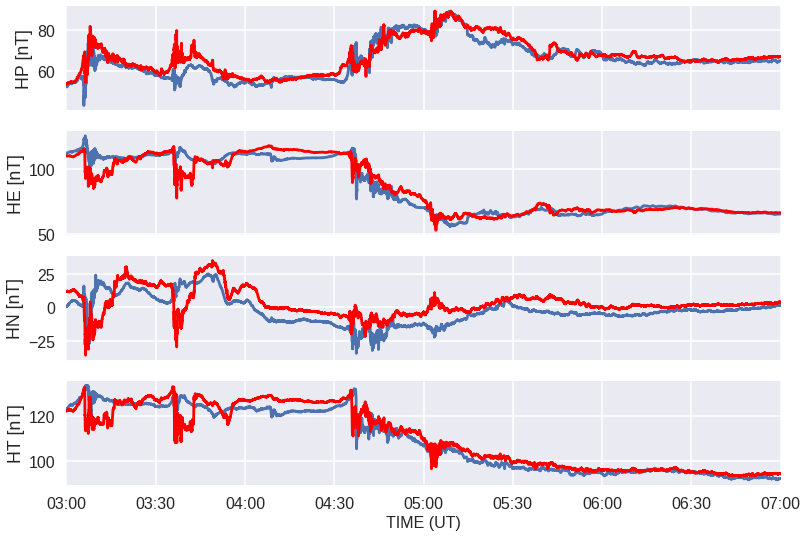

In [6]:
sns.set_style("darkgrid")
sns.set_context("poster")
f, axArr = plt.subplots(4, sharex=True)
axArr[0].plot(sat13DF["time_tag"].values, sat13DF["HP_1"].values)
axArr[0].plot(sat15DF["time_tag"].values, sat15DF["HP_1"].values, 'r')
axArr[1].plot(sat13DF["time_tag"].values, sat13DF["HE_1"].values) 
axArr[1].plot(sat15DF["time_tag"].values, sat15DF["HE_1"].values, 'r')
axArr[2].plot(sat13DF["time_tag"].values, sat13DF["HN_1"].values)
axArr[2].plot(sat15DF["time_tag"].values, sat15DF["HN_1"].values, 'r')
axArr[3].plot(sat13DF["time_tag"].values, sat13DF["HT_1"].values)
axArr[3].plot(sat15DF["time_tag"].values, sat15DF["HT_1"].values, 'r')
# Y-labels
axArr[0].set_ylabel("HP [nT]")
axArr[1].set_ylabel("HE [nT]")
axArr[2].set_ylabel("HN [nT]")
axArr[3].set_ylabel("HT [nT]")
# x-label
axArr[-1].set_xlabel("TIME (UT)", fontsize=16)
# format the axes
for axx in axArr:
    axx.set_xlim( [startDate, endDate] )
    axx.get_xaxis().set_major_formatter(DateFormatter('%H:%M'))

In [8]:
sat13DF.head()

,time_tag_orbit,time_tag,west_longitude,HP_1,HP_2,HE_1,HE_2,HN_1,HN_2,HT_1,HT_2,sat
21082,2011-07-05,2011-07-05 03:00:00.250,75.2,52.1277,45.314,111.701,112.725,0.524431,9.59106,123.267,121.87,g13
21083,2011-07-05,2011-07-05 03:00:00.763,75.2,52.1158,45.3153,111.75,112.77,0.499015,9.62851,123.306,121.915,g13
21084,2011-07-05,2011-07-05 03:00:01.277,75.2,52.1096,45.3081,111.766,112.769,0.485899,9.64927,123.318,121.913,g13
21085,2011-07-05,2011-07-05 03:00:01.787,75.2,52.1158,45.3211,111.75,112.751,0.499015,9.67626,123.306,121.903,g13
21086,2011-07-05,2011-07-05 03:00:02.300,75.2,52.1364,45.3205,111.747,112.735,0.540815,9.67534,123.312,121.889,g13
